In [61]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
import  matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_percentage_error
import random
import torch
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
seed_everything(seed=521)

In [62]:
train= pd.read_excel('../dataset/pre_train.xlsx')
test= pd.read_excel('../dataset/pre_test.xlsx')

In [63]:
X_columns = [col for col in train.columns if col not in ['time','AQ']]
Y_columns =['AQ']

In [64]:
x_train=train[X_columns]
y_train=train[Y_columns]
x_test=test[X_columns]
y_test=test[Y_columns]

In [65]:
from sklearn import linear_model as lm
m10_bayes = lm.BayesianRidge(n_iter=3,tol=0.001, alpha_1=1e-06,
alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06,)  # 线性回归
m10_bayes.fit(x_train,y_train)


BayesianRidge(n_iter=3)

In [66]:
# import joblib
# joblib.dump(model, './mpkl/m8_bayes_.pkl')
# m8_bayes = joblib.load('./mpkl/m8_bayes_.pkl')

In [68]:
train_index=train.index
y_train_pred=m10_bayes.predict(x_train)
y_train_pred=pd.DataFrame(columns=['AQ'],data=y_train_pred)


In [69]:
test_index=test.index
y_test_pred=m10_bayes.predict(x_test)
y_test_pred=pd.DataFrame(columns=['AQ'],data=y_test_pred)

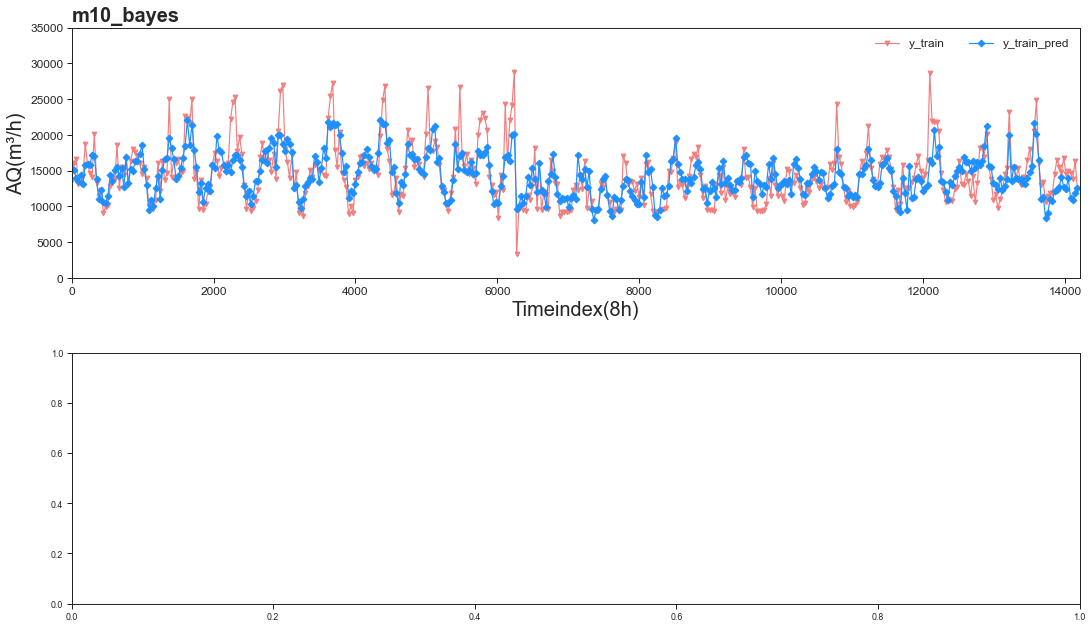

In [70]:
import seaborn as sns
sns.set(context='paper', style='ticks')

fig,axes=plt.subplots(2,1,figsize=(20,10))
ax1=axes[0]
ax2=axes[1]
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)


x=train_index[::32]
y1=y_train['AQ'][::32]
y2=y_train_pred['AQ'][::32]
lns1=ax1.plot(x,y1,label='y_train',marker='v',markevery=1, color='lightcoral')
lns2=ax1.plot(x,y2,label='y_train_pred',marker='D',markevery=1, color='dodgerblue')
ax1.tick_params(labelsize=12)
ax1.set_xlim(0,14208,2000)
ax1.set_ylim(0,35000, 5000)
ax1.set_xlabel('Timeindex(8h)',size=20)
ax1.set_ylabel('AQ(m³/h)',size=20)
ax1.set_title('m10_bayes',size=20,fontweight='bold',loc='left')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1,fontsize=12,ncol=2,frameon=False)

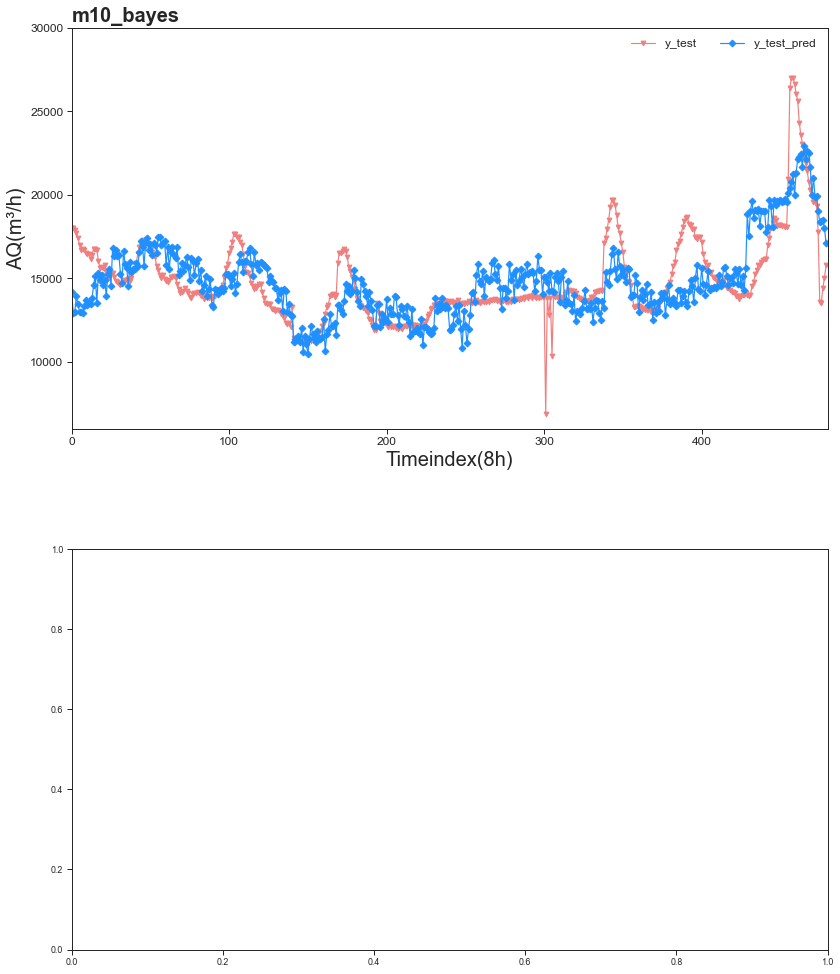

In [71]:
import seaborn as sns
sns.set(context='paper', style='ticks')

fig,axes=plt.subplots(2,1,figsize=(15,16))
ax1=axes[0]
ax2=axes[1]
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)


x=test_index
y1=y_test['AQ']
y2=y_test_pred['AQ']
lns1=ax1.plot(x,y1,label='y_test',marker='v',markevery=1, color='lightcoral')
lns2=ax1.plot(x,y2,label='y_test_pred',marker='D',markevery=1, color='dodgerblue')
ax1.tick_params(labelsize=12)
ax1.set_xlim(0,480,1)
ax1.set_ylim(6000,30000, 5000)
ax1.set_xlabel('Timeindex(8h)',size=20)
ax1.set_ylabel('AQ(m³/h)',size=20)
ax1.set_title('m10_bayes',size=20,fontweight='bold',loc='left')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1,fontsize=12,ncol=2,frameon=False)

In [72]:


frame=pd.DataFrame()
frame['ytrain']=y_train_pred
frame['ytest']=y_test_pred
frame.to_excel('../goaldata/m8_bayes.xlsx')